In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('./insurance.csv')
df = pd.DataFrame(data=data)

In [22]:
pd.isna(data).sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
X = df.iloc[:,:-1]
X.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
dtype: int64

In [25]:
Y = df.iloc[:,-1]
Y.count()
Y = Y.astype('int')

# ONE HOT ENCODING

In [26]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

# LABEL ENCODING

In [27]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    LE = preprocessing.LabelEncoder()
    return LE.fit_transform(series)

# Encoding X features

In [28]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [29]:
X = EncodingSelection(X)

In [30]:
X[0]

array([ 0. ,  0. ,  0. ,  1. , 19. ,  0. , 27.9,  0. ,  1. ])

<Axes: xlabel='bmi', ylabel='charges'>

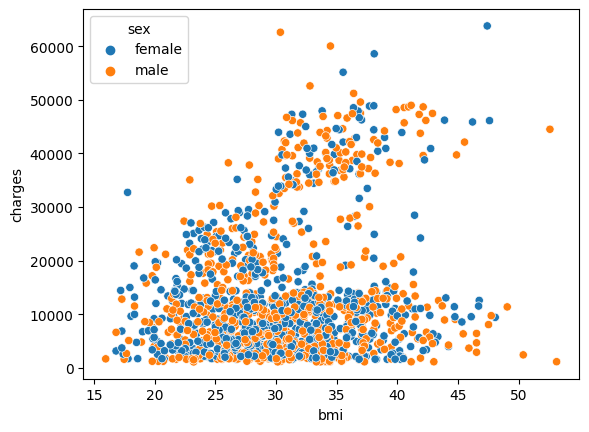

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data, x = 'bmi', y='charges', hue='sex')
# plt.ylim(500, 100000)
# plt.

# FEATURE SELECTION

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

In [33]:
k_best = SelectKBest(score_func=chi2, k=4)

In [34]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [35]:
x_temp = MMS.fit_transform(X)

In [36]:
x_temp = k_best.fit(x_temp, Y)

In [39]:
x_temp.scores_

array([ 997.48148148,  984.18153846,  948.26923077,  967.71384615,
        269.42943268,  655.07248521,   89.34794191,  350.42730375,
       1059.11678832])

In [40]:
for i in np.sort(x_temp.scores_):
    print('{0:.10f}'.format(i))

89.3479419059
269.4294326757
350.4273037543
655.0724852071
948.2692307692
967.7138461538
984.1815384615
997.4814814815
1059.1167883212


In [42]:
best_features = np.argsort(x_temp.scores_)[-4:]
best_features

array([3, 1, 0, 8], dtype=int64)